In [2]:

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [6]:
df = pd.read_csv("data/large_heights.csv")
df.sample(5)

,gender,height
654,Male,69.524944
3000,Male,67.782658
4570,Male,68.015295
9296,Female,64.765255
943,Male,62.804191


In [24]:
df.shape

(10000, 2)

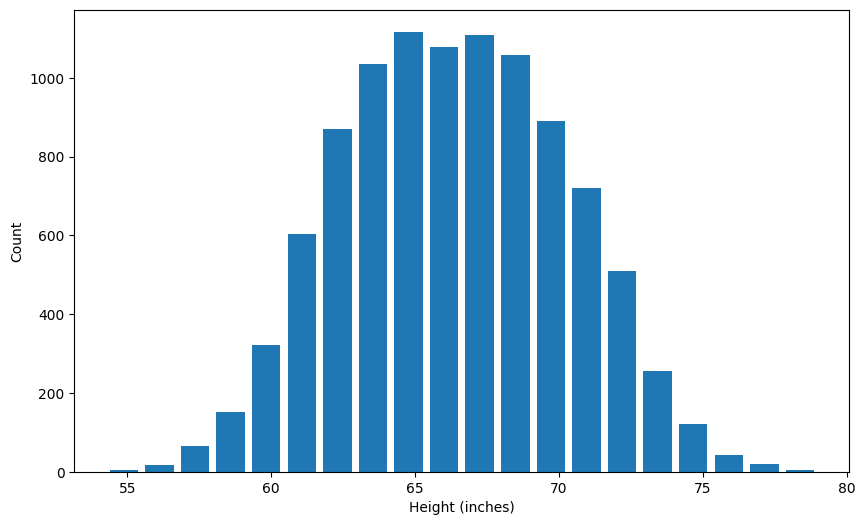

In [25]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

Plot bell curve along with histogram for our dataset

In [26]:
df.height.min()

54.26313333

In [27]:
df.height.max()

78.99874235

In [28]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

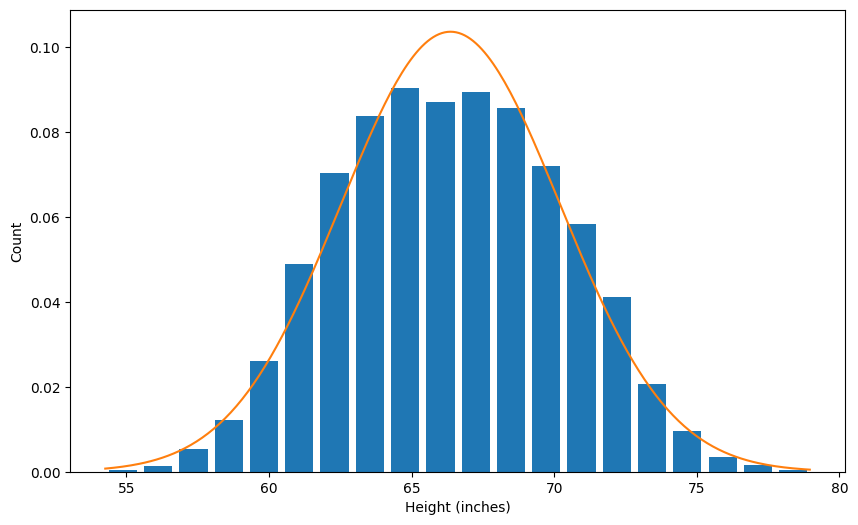

In [29]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [30]:
df.height.mean()

66.367559754866

In [31]:
df.height.std()

3.847528120795573

Outlier detection and removal using 3 standard deviation

In [32]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [33]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

In [34]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [35]:
#Above the heights on higher end is 78 inch which is around 6 ft 6 inch. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points. Similarly on lower end it is 54 inch which is around 4 ft 6 inch. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

Now remove these outliers and generate new dataframe 

In [36]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [37]:
df_no_outlier_std_dev.shape

(9993, 2)

In [38]:
df.shape[0] - df_no_outlier_std_dev.shape[0]

7

Outlier detection and removal using Z Score

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score



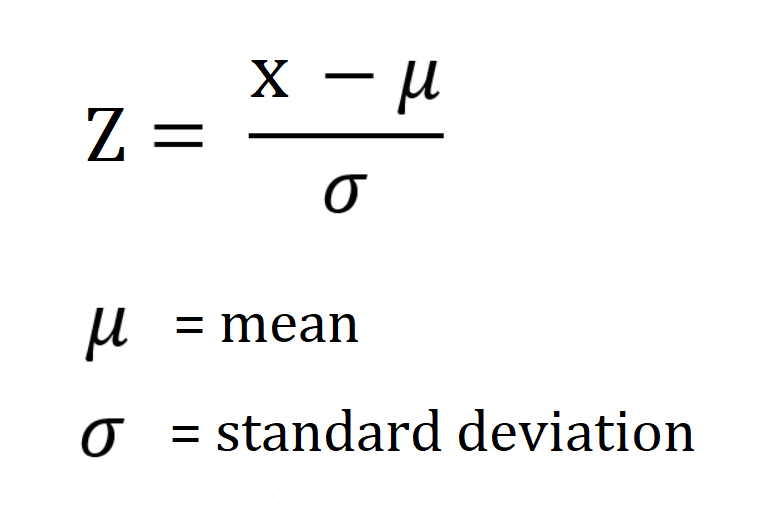

In [39]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [40]:
(73.84-66.37)/3.84

1.9453124999999998

In [41]:
# Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [42]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [44]:
# Here is the list of all outliers
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [45]:
# Remove the outliers and produce new dataframe
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [46]:
df_no_outliers.shape

(9993, 3)

In [47]:
df.shape

(10000, 3)

outliers using percentile first

# Now remove outliers using 4 standard deviation